In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
#import PyQt5
#%matplotlib qt
#matplotlib.use('Qt5Agg')
%matplotlib qt5

In [2]:
image = cv2.imread('business_card1.jpg')

In [3]:
image_copy = np.copy(image)
image_copy=cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
#

In [4]:
plt.imshow(image_copy)

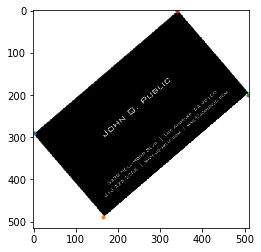

In [5]:
%matplotlib inline

plt.imshow(image_copy)
plt.plot(0,290,'.')
plt.plot(165,490,'.')
plt.plot(509,200,'.')
plt.plot(340,0,'.')


In [13]:
def wrap(image):
    
    # Four Source coordinates, which define a rectangular plane
    source_points=np.float32(
            [[0,290],
             [165,490],
             [509,200],
             [340,0]
            ])
    # Four wrapped coordinates
    wraped_points = np.float32(
            [[0,100],
             [0,500],
             [500,500],
             [500,100]])
    # Compute the prespective transform, M
    
    """
    OpenCV provides two transformation functions, cv2.warpAffine
    and cv2.warpPerspective, with which you can have all kinds of
    transformations. cv2.warpAffine takes a 2x3 transformation
    matrix while cv2.warpPerspective takes a 3x3 transformation
    matrix as input.
    """
    
    M = cv2.getPerspectiveTransform(source_points,wraped_points)
    
    # Compute the inverse
    M_inv = cv2.getPerspectiveTransform(wraped_points,source_points)
    
    
    #Get image size (width and height)
    
    image_size = (image.shape[1],image.shape[0])
    
    # Compute and return the wraped image
    
    wraped = cv2.warpPerspective(image,M,image_size, flags= cv2.INTER_LINEAR)
    
    
    return wraped

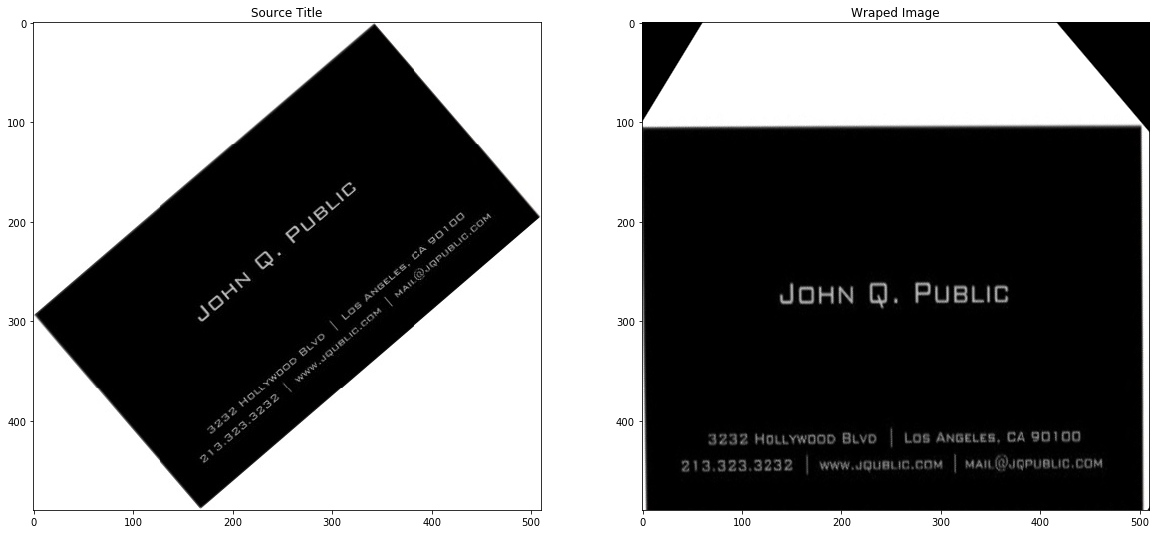

In [14]:
wraped_image = wrap(image_copy)

#create image side by side

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.set_title('Source Title')
ax1.imshow(image_copy)

ax2.set_title('Wraped Image')
ax2.imshow(wraped_image)